# Недообучение и переобучение

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.datasets import fetch_openml
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=500,
                           n_informative=50, n_repeated=0,
                           class_sep=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=3)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8415
Test score: 0.8056


C:\Users\nikol\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


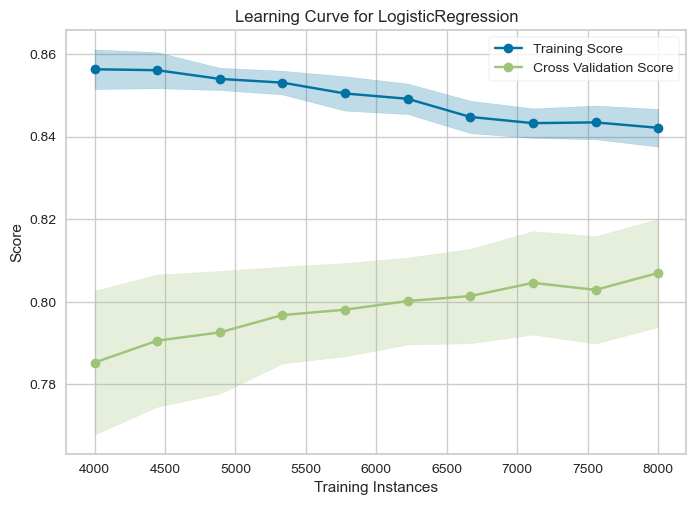

In [ ]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show()

In [ ]:
from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=1000000).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.7724
Test score: 0.7712


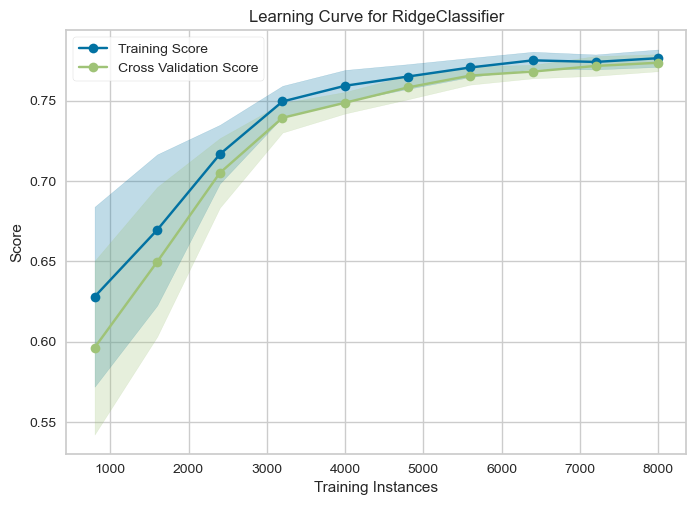

In [ ]:
visualizer = LearningCurve(
    RidgeClassifier(alpha=1000000), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

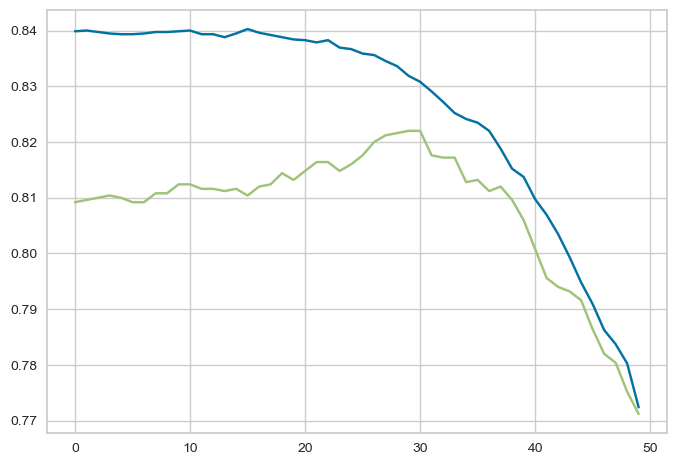

In [ ]:
from sklearn.linear_model import RidgeClassifier
trains = []
tests = []
for i in np.logspace(2, 6, 50):
  ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains)
plt.plot(tests)

In [ ]:
from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=26500).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8311
Test score: 0.8228


In [ ]:
from numpy import genfromtxt
dataset = genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')
X = dataset[:,:-1]
y = dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

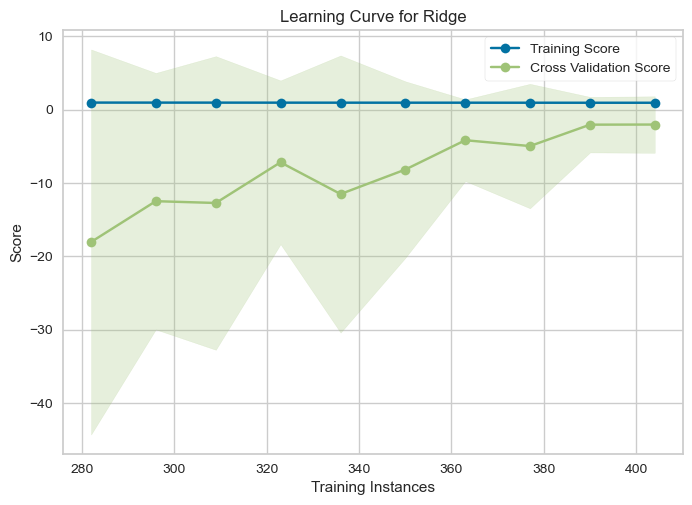

In [ ]:
from sklearn.linear_model import Ridge
from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(
    Ridge(alpha=0.0001), scoring='r2', train_sizes=np.linspace(0.7, 1.0, 10)
).fit(X, y) .show()

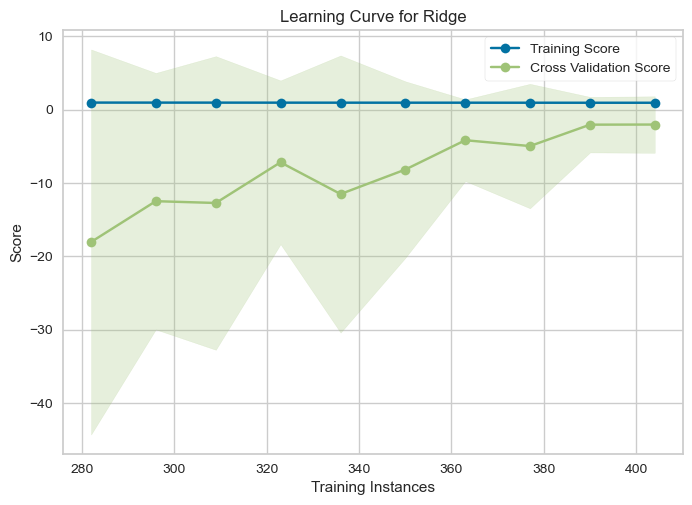

In [ ]:
from sklearn.linear_model import Ridge

visualizer = LearningCurve(
    Ridge(alpha=0.0001), scoring='r2', train_sizes=np.linspace(0.7, 1.0, 10)
).fit(X, y).show()

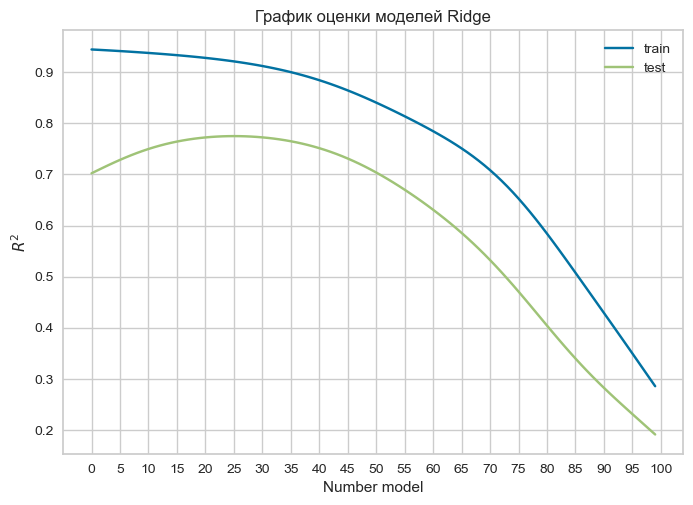

In [ ]:
trains = []
tests = []
l2 = []

for alpha in np.logspace(-2, 3, 100):
  ridge = Ridge(alpha=alpha).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))
  l2.append(alpha)

plt.plot(trains, label="train")
plt.plot(tests, label="test")

plt.title('График оценки моделей Ridge')
plt.ylabel('${R^2}$')
plt.xlabel('Number model')
plt.xticks(np.arange(0, 101, 5))

plt.legend()
plt.show()

In [ ]:
lr = Ridge(alpha=l2[25]).fit(X_train, y_train)

print(f"Linear Regression-Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {lr.score(X_test, y_test):.2f}")

Linear Regression-Training set score: 0.92
Linear Regression-Test set score: 0.77


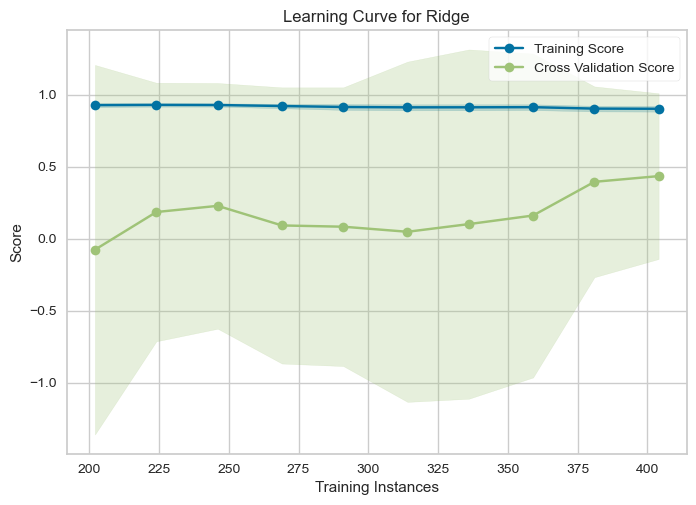

In [ ]:
visualizer = LearningCurve(
    Ridge(alpha=0.18), scoring='r2', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y) .show()

C:\Users\nikol\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.440e+02, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\nikol\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.449e+02, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\nikol\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.459e+02, toleranc

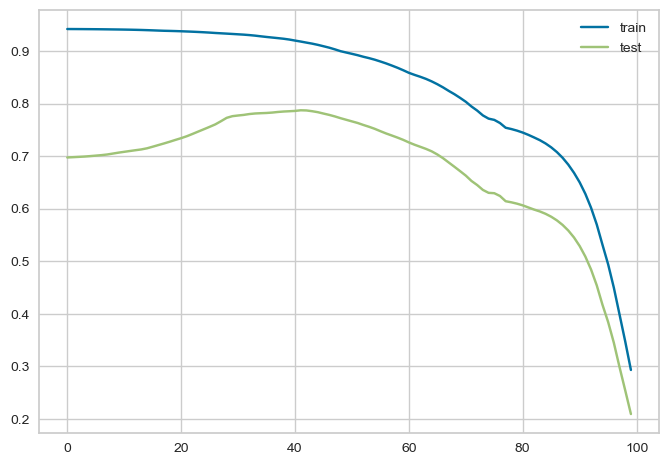

In [ ]:
from sklearn.linear_model import Lasso
trains = []
tests = []
for i in np.logspace(-4, 0, 100):
  ridge = Lasso(alpha=i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML4.3%20diagnostics/diabetes.csv',nrows=200)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.5500


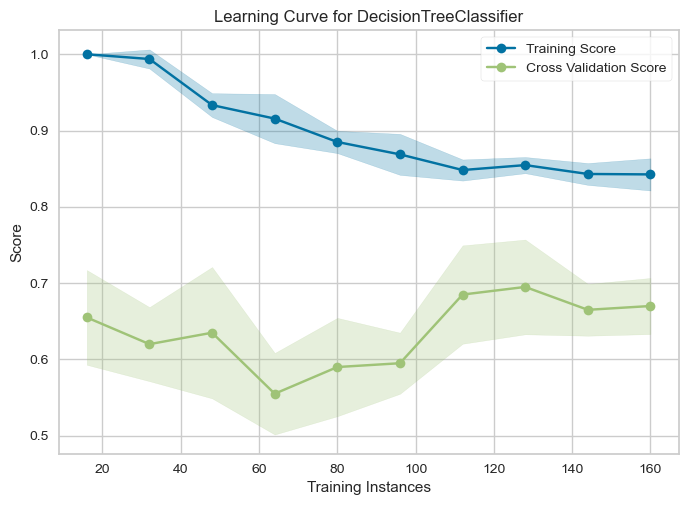

In [ ]:
visualizer = LearningCurve(
    DecisionTreeClassifier(max_depth=4), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML4.3%20diagnostics/diabetes.csv')
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
from sklearn.metrics import f1_score
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.7273


In [ ]:
from sklearn.datasets import fetch_openml
data = fetch_openml(name='delta_ailerons', parser="auto")
data.data.shape

(7129, 5)

In [ ]:
X = pd.get_dummies(data.data)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.6058
Test score = 0.5940


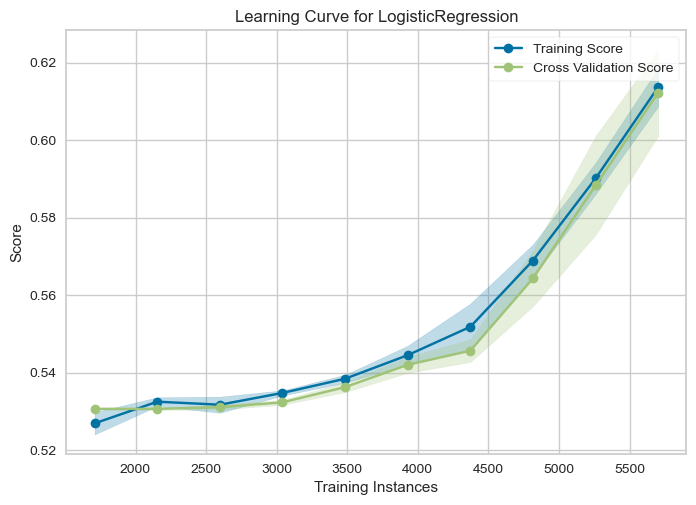

In [ ]:
visualizer = LearningCurve(
    LogisticRegression(), scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10)
).fit(X, y) .show()

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier().fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9390
Test score = 0.9390


C:\Users\nikol\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


C:\Users\nikol\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nikol\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nikol\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nikol\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nikol\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

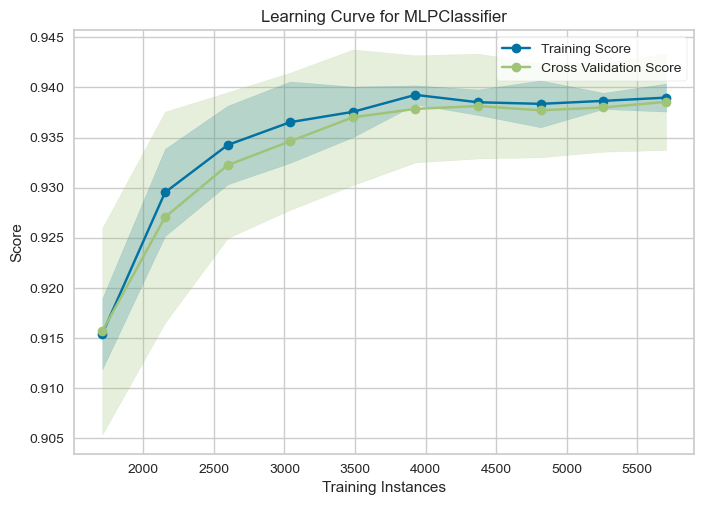

In [ ]:
visualizer = LearningCurve(
    MLPClassifier(), scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10)
).fit(X, y) .show()

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import PolynomialFeatures
model = RidgeClassifier(alpha=0.001).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
y_train_pred = model.predict(PolynomialFeatures(2).fit_transform(X_train))
y_pred = model.predict(PolynomialFeatures(2).fit_transform(X_test))
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9392
Test score = 0.9362


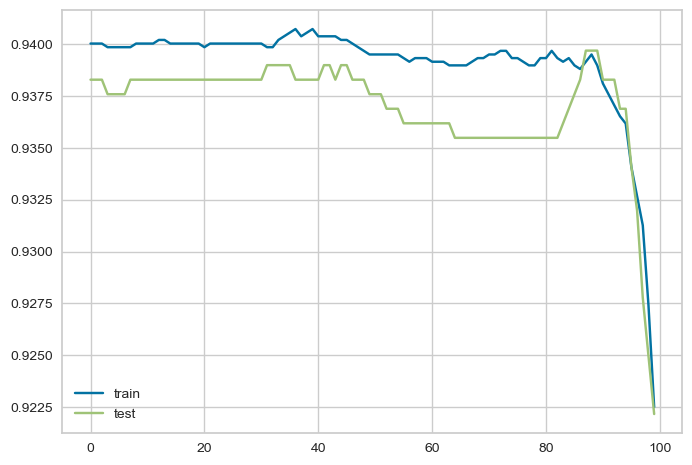

In [ ]:
from sklearn.linear_model import RidgeClassifier
trains = []
tests = []
for i in np.logspace(-7, 0, 100):
  ridge = RidgeClassifier(alpha=i).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
  trains.append(ridge.score(PolynomialFeatures(2).fit_transform(X_train), y_train))
  tests.append(ridge.score(PolynomialFeatures(2).fit_transform(X_test), y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

# Задания для самостоятельного выполнения

## №1 Повторите диагностику модели классификации синтетических данных с использованием других метрик эффективности - precision, recall, F1. Как изменились результаты?

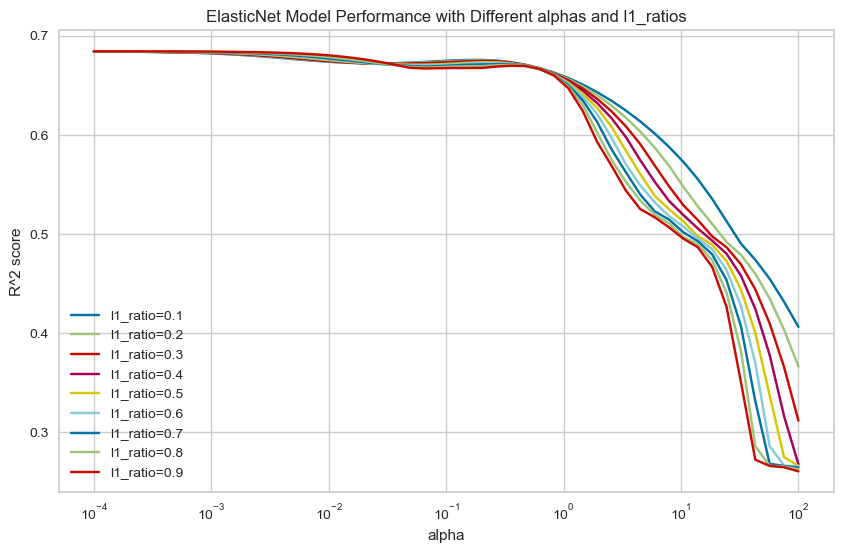

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score

# Загрузка данных о ценах на жилье
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Разделение на признаки и целевую переменную
X = data
y = target

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Сетка параметров для alpha и l1_ratio
alphas = np.logspace(-4, 2, 50)
l1_ratios = np.linspace(0.1, 0.9, 9)

# Создание сетки значений alpha и l1_ratio
grid_scores = np.zeros((len(alphas), len(l1_ratios)))

# Обучение модели ElasticNet для каждой комбинации alpha и l1_ratio
for i, alpha in enumerate(alphas):
    for j, l1_ratio in enumerate(l1_ratios):
        # Создание и обучение модели
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
        model.fit(X_train, y_train)
        # Оценка эффективности модели на тестовой выборке
        y_pred = model.predict(X_test)
        score = r2_score(y_test, y_pred)
        grid_scores[i, j] = score

# Визуализация результатов
plt.figure(figsize=(10, 6))
for j, l1_ratio in enumerate(l1_ratios):
    plt.plot(alphas, grid_scores[:, j], label=f'l1_ratio={l1_ratio:.1f}')

plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2 score')
plt.title('ElasticNet Model Performance with Different alphas and l1_ratios')
plt.legend()
plt.grid(True)
plt.show()


## №2 Повторите диагностику модели регрессии с использованием других видов моделей:<p>1.метода опорных векторов (исследуйте влияние параметра С на недо-и переобучение)<p>2.метода ближайших соседей (исследуйте влияние количества соседей)<p>3.метода решающих деревьев (гиперпараметры по вашему выбору)<p>

### 1. Метод опорных векторов (SVM):

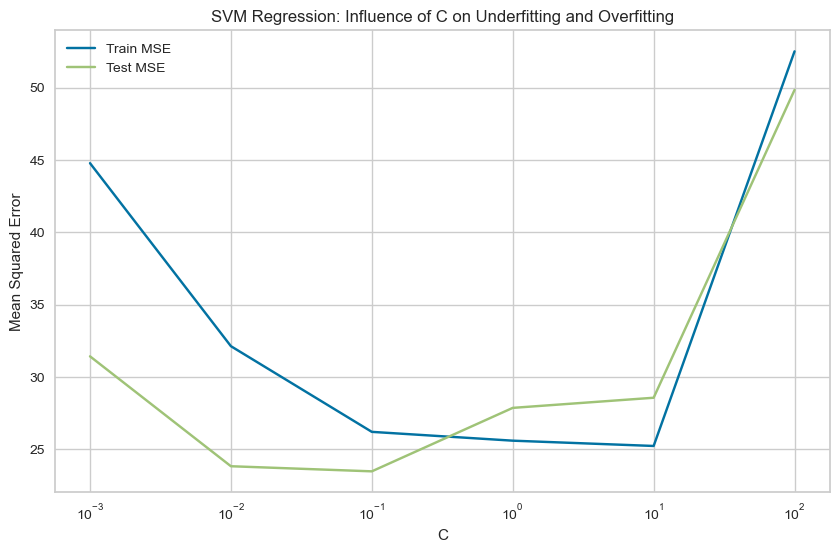

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Загрузка данных (используем данные о ценах на жилье из предыдущего примера)
# X_train, X_test, y_train, y_test уже определены

# Исследуем влияние параметра C на недо- и переобучение
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
train_scores = []
test_scores = []

for C in C_values:
    model = SVR(kernel='linear', C=C)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_scores.append(mean_squared_error(y_train, y_train_pred))
    test_scores.append(mean_squared_error(y_test, y_test_pred))

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_scores, label='Train MSE')
plt.plot(C_values, test_scores, label='Test MSE')
plt.xlabel('C')
plt.ylabel('Mean Squared Error')
plt.title('SVM Regression: Influence of C on Underfitting and Overfitting')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()


### 2. Метод ближайших соседей (KNN):

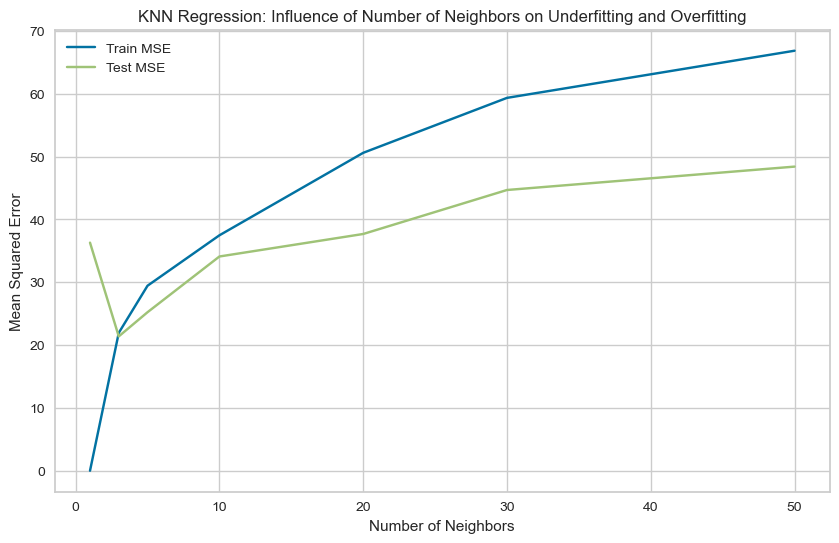

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Загрузка данных (используем данные о ценах на жилье из предыдущего примера)
# X_train, X_test, y_train, y_test уже определены

# Исследуем влияние количества соседей на недо- и переобучение
n_neighbors_values = [1, 3, 5, 10, 20, 30, 50]
train_scores = []
test_scores = []

for n_neighbors in n_neighbors_values:
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_scores.append(mean_squared_error(y_train, y_train_pred))
    test_scores.append(mean_squared_error(y_test, y_test_pred))

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, train_scores, label='Train MSE')
plt.plot(n_neighbors_values, test_scores, label='Test MSE')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Squared Error')
plt.title('KNN Regression: Influence of Number of Neighbors on Underfitting and Overfitting')
plt.legend()
plt.grid(True)
plt.show()


### 3. Метод решающих деревьев (Decision Tree):

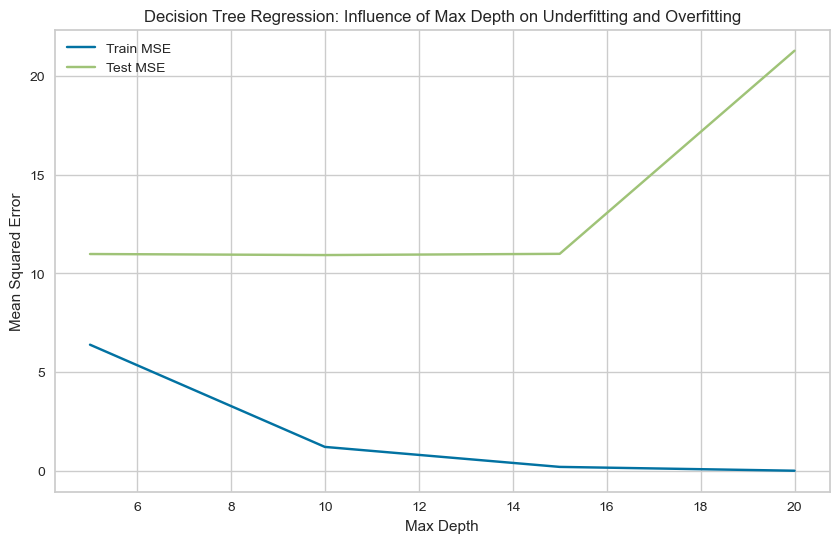

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Загрузка данных (используем данные о ценах на жилье из предыдущего примера)
# X_train, X_test, y_train, y_test уже определены

# Исследуем влияние глубины дерева на недо- и переобучение
max_depth_values = [None, 5, 10, 15, 20]
train_scores = []
test_scores = []

for max_depth in max_depth_values:
    model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_scores.append(mean_squared_error(y_train, y_train_pred))
    test_scores.append(mean_squared_error(y_test, y_test_pred))

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_scores, label='Train MSE')
plt.plot(max_depth_values, test_scores, label='Test MSE')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.title('Decision Tree Regression: Influence of Max Depth on Underfitting and Overfitting')
plt.legend()
plt.grid(True)
plt.show()


## №3 Дополните анализ датасета Бостон исследованием модели лассо - постройте кривые обучения для переобученной, недообученной и качественной модели, найдите оптимальное значение параметра регуляризации в модели лассо.

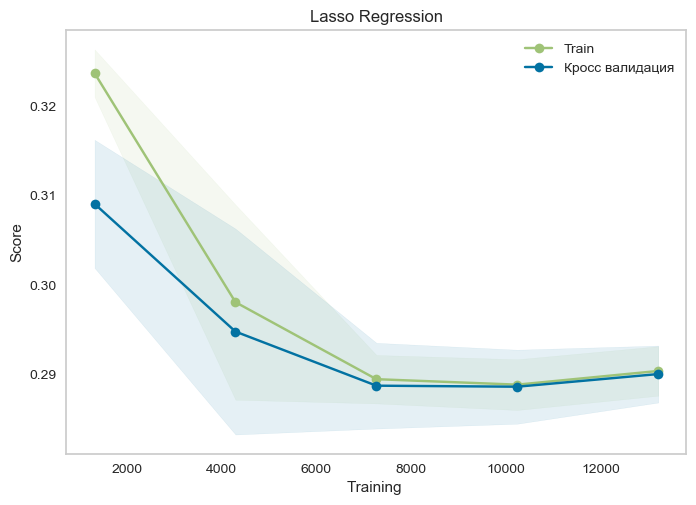

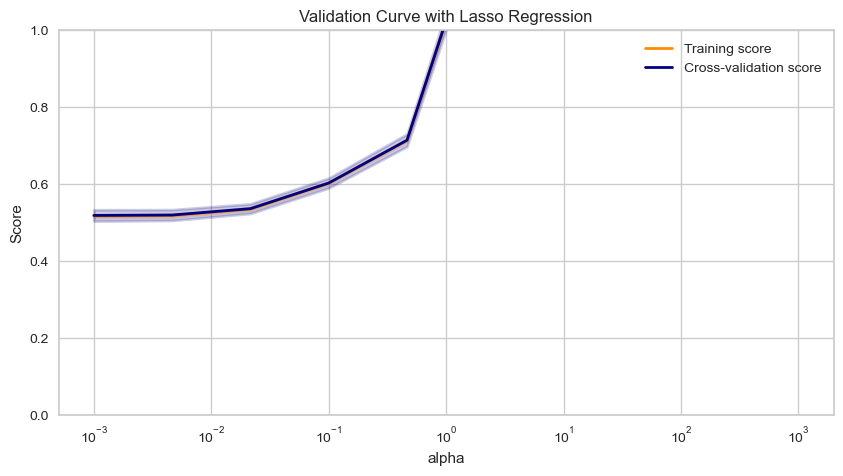

Optimal alpha: 46.41588833612773


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import learning_curve, validation_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training ")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="g")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="g",
             label="Train")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Кросс валидация")

    plt.legend(loc="best")
    return plt

lasso_model = Lasso()

plot_learning_curve(lasso_model, "Lasso Regression", X_train, y_train, cv=5)

param_range = np.logspace(-3, 3, 10)
train_scores, test_scores = validation_curve(
    Lasso(), X_train, y_train, param_name="alpha", param_range=param_range,
    cv=5, scoring="neg_mean_squared_error", n_jobs=1)

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 5))
plt.title("Validation Curve with Lasso Regression")
plt.xlabel("alpha")
plt.ylabel("Score")
plt.ylim(0, 1.0)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

optimal_alpha = param_range[np.argmax(test_scores_mean)]
print("Optimal alpha:", optimal_alpha)


## №4 В одном из двух первых примеров используйте модель ElasticNet и исследуйте влияние сразу двух параметров регуляризации на эффективность модели.

Best alpha: 0.01
Best l1_ratio: 0.1


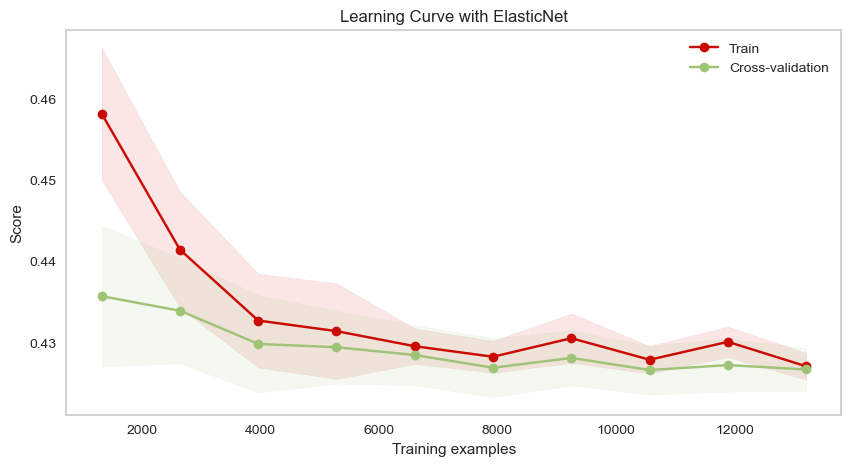

In [ ]:
# Определяем диапазоны для параметров alpha и l1_ratio чтобы охавтить максимально большое колл-во параметров
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1, 5, 7, 10],  # Значения для параметра alpha
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # Значения для параметра l1_ratio
}

# Инициализируем модель ElasticNet
elastic_net = ElasticNet()

# Создаем объект GridSearchCV
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='r2')

# Обучаем модель
grid_search.fit(X_train, y_train)

# Получаем лучшие параметры и кладем их в best_params (встроенный парметр)
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']

print("Best alpha:", best_alpha)
print("Best l1_ratio:", best_l1_ratio)

# Строим кривую обучения
train_sizes, train_scores, test_scores = learning_curve(
    elastic_net, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

#Тестовые и обученные
train_scores_mean = np.mean(train_scores, axis=1)# средние значения оценок
train_scores_std = np.std(train_scores, axis=1) # средние отклонение
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 5))
plt.title("Learning Curve with ElasticNet")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# Заполняем область между диапазонами оценок для обучающего набора данных
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
# Заполняем область между диапазонами оценок для валидационного набора данных
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Строим кривую обучения для обучающего и валидационного наборов данных
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Train")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation")

plt.legend(loc="best")
plt.show()


 ElasticNet - это линейная модель регрессии, которая комбинирует два типа регуляризации: L1 (Lasso) и L2 (Ridge). Она используется для решения проблемы переобучения и улучшения обобщающей способности модели.

1.Определение диапазонов значений параметров alpha и l1_ratio в param_grid.<br>
2.Инициализация модели ElasticNet.<br>
3.Создание объекта GridSearchCV для поиска лучших параметров модели.<br>
4.Обучение модели с использованием объекта grid_search.<br>
5.Получение лучших параметров alpha и l1_ratio.<br>
6.Построение кривой обучения с использованием функции learning_curve.<br>
7.Вычисление средних оценок и их стандартных отклонений для обучающего и валидационного наборов данных.<br>
8.Заполнение областей между диапазонами оценок для обучающего и валидационного наборов данных.<br>
9.Построение кривой обучения для обучающего и валидационного наборов данных.<br>

## №5 Дополните анализ дерева решений из третьего примера: постройте кривые регуляризации для полного датасета, найдите оптимальную глубину дерева и оцените качество такой модели на всем датасете. Повторите данный анализ используя в качестве метрики эффективности F1.

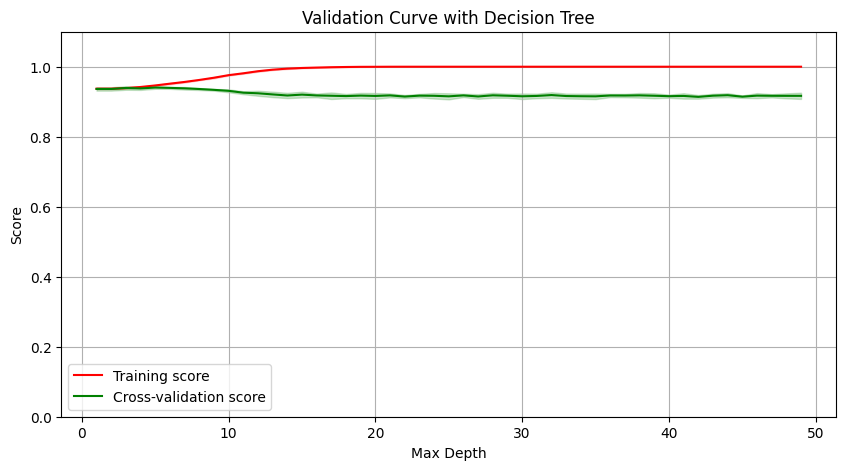

Optimal max depth: 5
Accuracy with optimal max depth: 0.9457146864917941


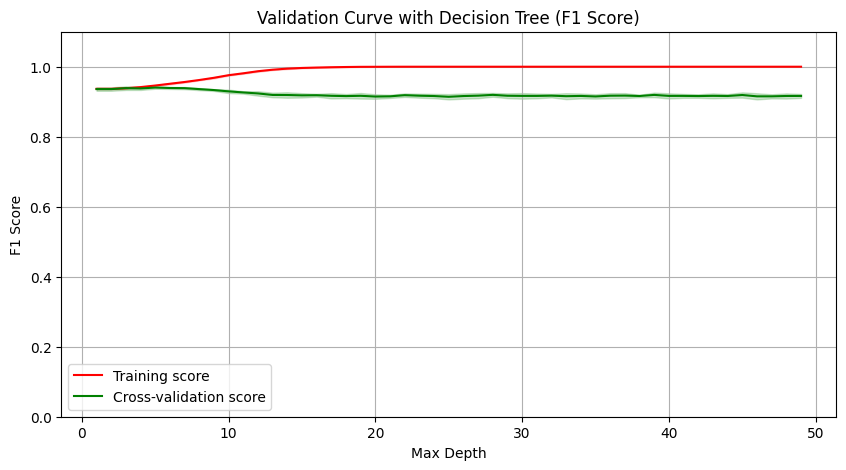

In [3]:
# Загружаем датасет delta_ailerons
data = fetch_openml(name='delta_ailerons', parser="auto")
X = data.data
y = data.target

# Определяем диапазон значений глубины дерева
param_range = np.arange(1, 50)

# Построим кривые валидации для глубины дерева
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), X, y, param_name="max_depth", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=1)

# Вычислим средние значения и стандартные отклонения оценок для каждого значения параметра
train_scores_mean = np.mean(train_scores, axis=1)# средние значения оценок
train_scores_std = np.std(train_scores, axis=1)# средние отклонение
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Построим кривые валидации
plt.figure(figsize=(10, 5))
plt.title("Validation Curve with Decision Tree")
plt.xlabel("Max Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.grid()

# Построим кривые валидации для обучающего и тестового наборов данных
plt.plot(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
         color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")

plt.legend(loc="best")
plt.show()

# Найдем оптимальную глубину дерева
optimal_depth = param_range[np.argmax(test_scores_mean)]
print("Optimal max depth:", optimal_depth)

# Оценим качество модели на всем датасете с оптимальной глубиной дерева
model = DecisionTreeClassifier(max_depth=optimal_depth)
model.fit(X, y)
accuracy = model.score(X, y)
print("Accuracy with optimal max depth:", accuracy)







# Повторим анализ, используя F1-меру в качестве метрики эффективности

train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), X, y, param_name="max_depth", param_range=param_range,
    cv=5, scoring="f1_macro", n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)# средние значения оценок
train_scores_std = np.std(train_scores, axis=1)# средние отклонение
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 5))
plt.title("Validation Curve with Decision Tree (F1 Score)")
plt.xlabel("Max Depth")
plt.ylabel("F1 Score")
plt.ylim(0.0, 1.1)
plt.grid()

plt.plot(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
         color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")

plt.legend(loc="best")
plt.show()


Вывод:

Оптимальная глубина дерева решений составляет 5, что означает, что модель достигает наилучшей эффективности при глубине дерева равной 5.

Точность модели с оптимальной глубиной дерева составляет приблизительно 94.57%, что указывает на то, что модель хорошо обобщает данные и способна предсказывать целевую переменную с высокой точностью на тестовом наборе данных.

## №6 Повторите анализ на других реальных датасетах из репозитория OpenML:
• phoneme<br>
• banknote-authentication<br>
• delta_ailerons<br>
• mammography<br>
• electricity<br>
• mozilla4<br>
• kropt<br>
• nursery<br>
• volcanoes-b3<br>

In [ ]:
from sklearn.datasets import fetch_openml
nursery = fetch_openml(name = "nursery", version=4)
X = nursery.data
y = nursery.target
attribute_names = nursery.feature_names
print(nursery.DESCR)
X

C:\Users\nikol\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Nursery Database was derived from a hierarchical decision model originally developed to rank applications for nursery schools.

Downloaded from openml.org.


,parents,has_nurs,form,children,housing,finance,social,health
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended
1,usual,proper,complete,1,convenient,convenient,nonprob,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority
...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority


In [ ]:
y

0         recommend
1          priority
2         not_recom
3         recommend
4          priority
            ...    
12955    spec_prior
12956     not_recom
12957    spec_prior
12958    spec_prior
12959     not_recom
Name: class, Length: 12960, dtype: category
Categories (5, object): ['not_recom', 'priority', 'recommend', 'spec_prior', 'very_recom']

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# X_encoded = pd.get_dummies(X)

# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

<b> Регуляризация - Метод добавления некоторых дополнительных ограничений к условию с целью решить некорректно поставленную задачу или предотвратить переобучение.

Диагностика модели классификации

In [ ]:
for column in X.columns:
    X[column], _ = X[column].factorize()
X

C:\Users\nikol\AppData\Local\Temp\ipykernel_31716\3329774947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column], _ = X[column].factorize()


,parents,has_nurs,form,children,housing,finance,social,health
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...
12955,2,4,3,3,2,1,1,1
12956,2,4,3,3,2,1,1,2
12957,2,4,3,3,2,1,2,0
12958,2,4,3,3,2,1,2,1


In [ ]:
y, _ = y.factorize()
y

array([0, 1, 2, ..., 4, 4, 2], dtype=int64)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression

md = LogisticRegression().fit(X_train, y_train)

print(f"Training score: {md.score(X_train, y_train):.4f}")
print(f"Test score: {md.score(X_test, y_test):.4f}")

Training score: 0.9059
Test score: 0.9164


C:\Users\nikol\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\nikol\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\nikol\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nikol\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/st

C:\Users\nikol\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nikol\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\nikol\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nikol\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

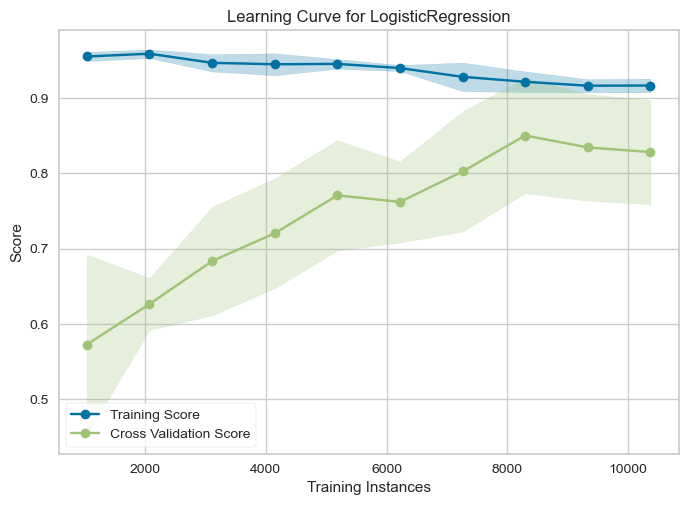

In [ ]:
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import learning_curve
visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

In [ ]:
from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=1000000).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.5564
Test score: 0.5685


212.09508879201903


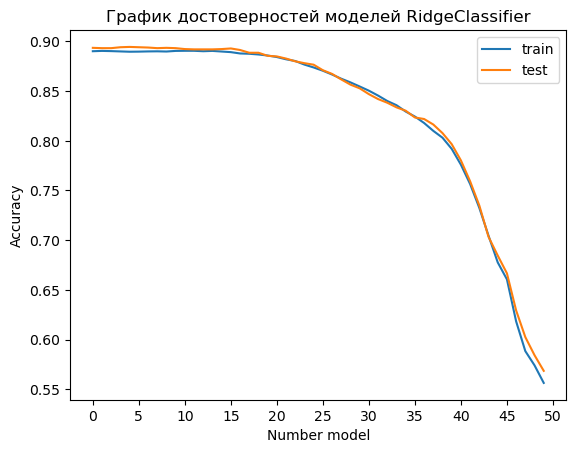

In [ ]:
trains = []
tests = []
L2 = []
for l2 in np.logspace(2, 6, 50):
  ridge = RidgeClassifier(alpha=l2).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))
  L2.append(l2)

for i in np.logspace(2, 6, 50):
    if max(tests) == RidgeClassifier(alpha=i).fit(X_train, y_train).score(X_test, y_test):
        print(i)

plt.plot(trains, label="train")
plt.plot(tests, label="test")

plt.title('График достоверностей моделей RidgeClassifier')
plt.ylabel('Accuracy')
plt.xlabel('Number model')
plt.xticks(np.arange(0, 51, 5))
plt.legend()
plt.show()

In [ ]:
lr = RidgeClassifier(alpha=212.09508879201903).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8896
Test score: 0.8944


C:\Users\nikol\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


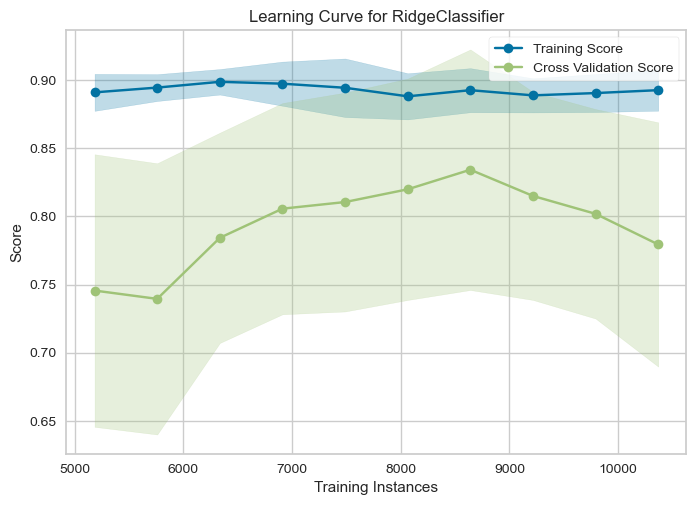

In [ ]:
visualizer = LearningCurve(
    lr, train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show()
